In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from sklearn.preprocessing import scale

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from PIL import Image

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz
import pydotplus
import io
import imageio
from scipy import misc

%matplotlib inline

In [2]:
database = pd.read_csv("data.csv", sep=';')

In [20]:
database.describe()

,binary-musk,2,3,4,5,6,7,8,9,10,...,159,160,161,162,163,164,165,166,167,168
count,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,...,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000,6599.000000
mean,0.154114,58.943931,-119.128959,-73.138960,-0.644340,-103.535536,18.385816,-14.131080,-1.845886,-86.024398,...,-184.764207,-75.765419,-26.071374,64.602364,112.036975,201.755569,-47.487801,-150.254584,41.781785,0.154114
std,0.361086,53.245061,90.806500,67.953889,80.448979,64.382893,80.615242,115.321111,90.371307,108.332372,...,107.846852,127.875236,69.722839,100.861016,72.829547,59.523444,55.065208,76.014501,94.113631,0.361086
min,0.000000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,0.000000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,0.000000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.000000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,0.000000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,1.000000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [4]:
database.head(10)

,MUSK,2,3,4,5,6,7,8,9,10,...,159,160,161,162,163,164,165,166,167,168
0,MUSK,46,-108,-60,-69,-117,49,38,-161,-8,...,-308,52,-7,39,126,156,-50,-112,96,1.0
1,MUSK,41,-188,-145,22,-117,-6,57,-171,-39,...,-59,-2,52,103,136,169,-61,-136,79,1.0
2,MUSK,46,-194,-145,28,-117,73,57,-168,-39,...,-134,-154,57,143,142,165,-67,-145,39,1.0
3,MUSK,41,-188,-145,22,-117,-7,57,-170,-39,...,-60,-4,52,104,136,168,-60,-135,80,1.0
4,MUSK,41,-188,-145,22,-117,-7,57,-170,-39,...,-60,-4,52,104,137,168,-60,-135,80,1.0
5,MUSK,46,-194,-145,28,-117,72,57,-168,-39,...,-138,-156,56,143,142,164,-67,-145,40,1.0
6,MUSK,47,-199,-106,28,-117,73,27,-104,-22,...,-133,-153,55,144,142,165,-68,-145,37,1.0
7,MUSK,41,-199,-101,22,-117,-6,26,-99,-21,...,-59,-1,50,100,135,169,-60,-135,81,1.0
8,MUSK,41,-199,-101,22,-117,-6,26,-100,-21,...,-59,-1,50,100,135,169,-60,-135,81,1.0
9,MUSK,47,-199,-106,28,-117,73,27,-104,-22,...,-133,-153,55,144,142,165,-68,-146,37,1.0


In [5]:
data=[]
for i in database['MUSK']:
    if i == "MUSK":
        data.append(1)
    else:
        data.append(0)


In [6]:
database.insert(1, 'binary-musk' ,data )


In [90]:
train, test = train_test_split(database, test_size = 0.25)
print("TRAINING SIZE: {};TEST SIZE:{}".format(len(train), len(test)))
c = DecisionTreeClassifier(min_samples_split=350, max_depth=32, criterion="entropy")

TRAINING SIZE: 4949;TEST SIZE:1650


In [91]:
features=["8","10","18","27","49","53","78","87","96","109","114","115","119","120","140","161"]

In [92]:
X_train=train[features]
y_train=train["binary-musk"]

X_test=test[features]
y_test=test["binary-musk"]

In [93]:
dt = c.fit(X_train,y_train)
y_pred= c.predict(X_test)

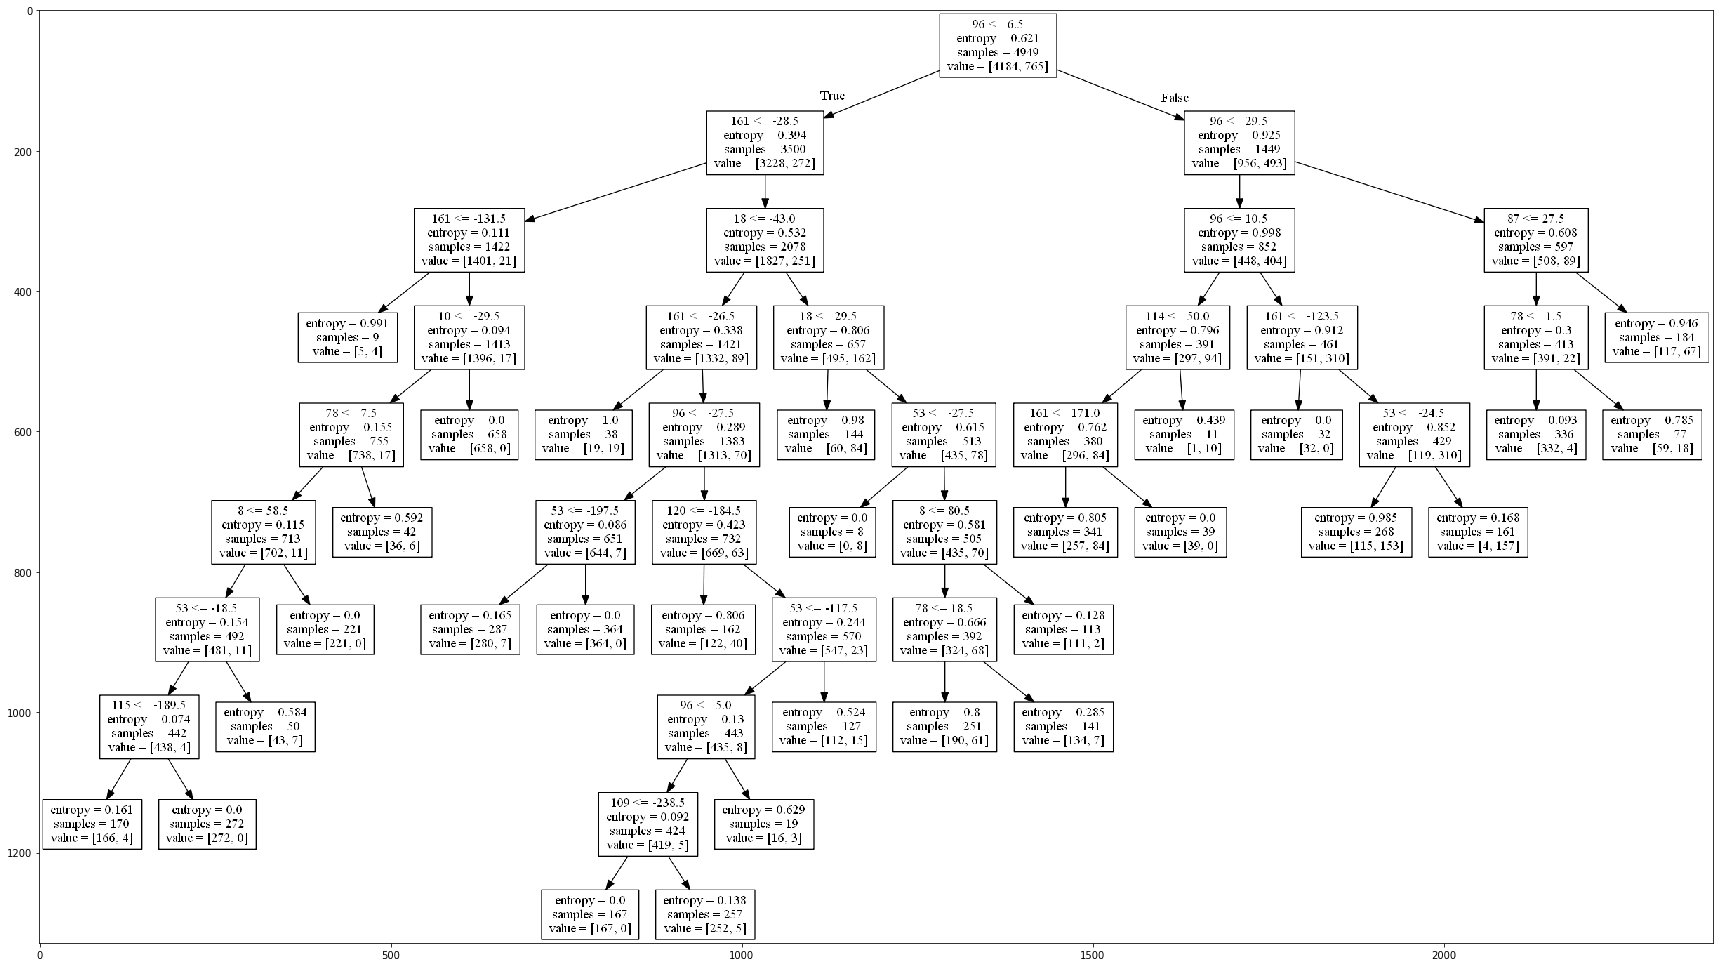

In [94]:
def show_tree(tree,features,path):
    f = io.StringIO()
    export_graphviz(tree,out_file=f, feature_names=features),
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img= imageio.imread(path)
    plt.rcParams["figure.figsize"]= (30, 30)
    plt.imshow(img)
Image.MAX_IMAGE_PIXELS = None
show_tree(dt, features,'dec_tree_01.png')

In [95]:
from sklearn.metrics import accuracy_score

score= accuracy_score(y_test, y_pred) * 100
print("ACCURACY_SCORE_USING_DECISION_TREE:",round(score,1),"%")

ACCURACY_SCORE_USING_DECISION_TREE: 89.0 %


In [96]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1398
           1       0.67      0.57      0.61       252

    accuracy                           0.89      1650
   macro avg       0.79      0.76      0.77      1650
weighted avg       0.88      0.89      0.89      1650



In [54]:
corrtable=database.corr()

In [55]:
corrtable

,binary-musk,2,3,4,5,6,7,8,9,10,...,159,160,161,162,163,164,165,166,167,168
binary-musk,1.000000,-0.120872,-0.099892,-0.089802,-0.098493,-0.045025,-0.089354,0.113160,-0.201597,0.147572,...,-0.003315,0.020904,0.097944,0.007176,-0.032969,-0.217440,-0.077269,0.049425,0.069057,1.000000
2,-0.120872,1.000000,-0.142463,-0.164302,-0.290986,0.001042,0.090580,0.071899,-0.416184,0.090719,...,0.010435,0.146366,-0.153099,0.002404,0.634797,-0.061304,0.142003,0.443042,-0.057215,-0.120872
3,-0.099892,-0.142463,1.000000,0.611646,-0.244107,-0.134688,0.125894,-0.449464,0.187302,-0.484119,...,0.172414,0.309328,0.339494,-0.030332,-0.118212,-0.028521,-0.069193,-0.133091,0.046355,-0.099892
4,-0.089802,-0.164302,0.611646,1.000000,-0.378598,-0.080984,0.210589,-0.754816,0.426311,-0.760330,...,0.261336,0.502985,0.259432,-0.020710,-0.206859,-0.131878,-0.110994,-0.086093,0.020523,-0.089802
5,-0.098493,-0.290986,-0.244107,-0.378598,1.000000,-0.044848,-0.222508,0.453924,0.184919,0.420557,...,-0.309178,-0.607554,-0.279427,-0.118496,-0.241301,0.182901,-0.189518,-0.364272,0.072811,-0.098493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,-0.217440,-0.061304,-0.028521,-0.131878,0.182901,0.027147,0.046697,0.131601,-0.090107,0.128068,...,-0.067484,-0.109791,-0.345945,-0.265230,-0.430394,1.000000,0.463791,-0.259654,-0.322005,-0.217440
165,-0.077269,0.142003,-0.069193,-0.110994,-0.189518,-0.046190,0.024329,0.049864,-0.266001,0.058610,...,0.010624,0.081277,-0.237205,-0.249085,-0.084308,0.463791,1.000000,0.484590,-0.137844,-0.077269
166,0.049425,0.443042,-0.133091,-0.086093,-0.364272,-0.090051,0.002706,0.000076,-0.298269,0.016361,...,0.056857,0.177644,-0.105101,-0.193089,0.352129,-0.259654,0.484590,1.000000,0.161716,0.049425
167,0.069057,-0.057215,0.046355,0.020523,0.072811,-0.081932,-0.050212,0.004823,0.139028,-0.002750,...,-0.036643,-0.040582,0.110245,-0.333306,0.071007,-0.322005,-0.137844,0.161716,1.000000,0.069057


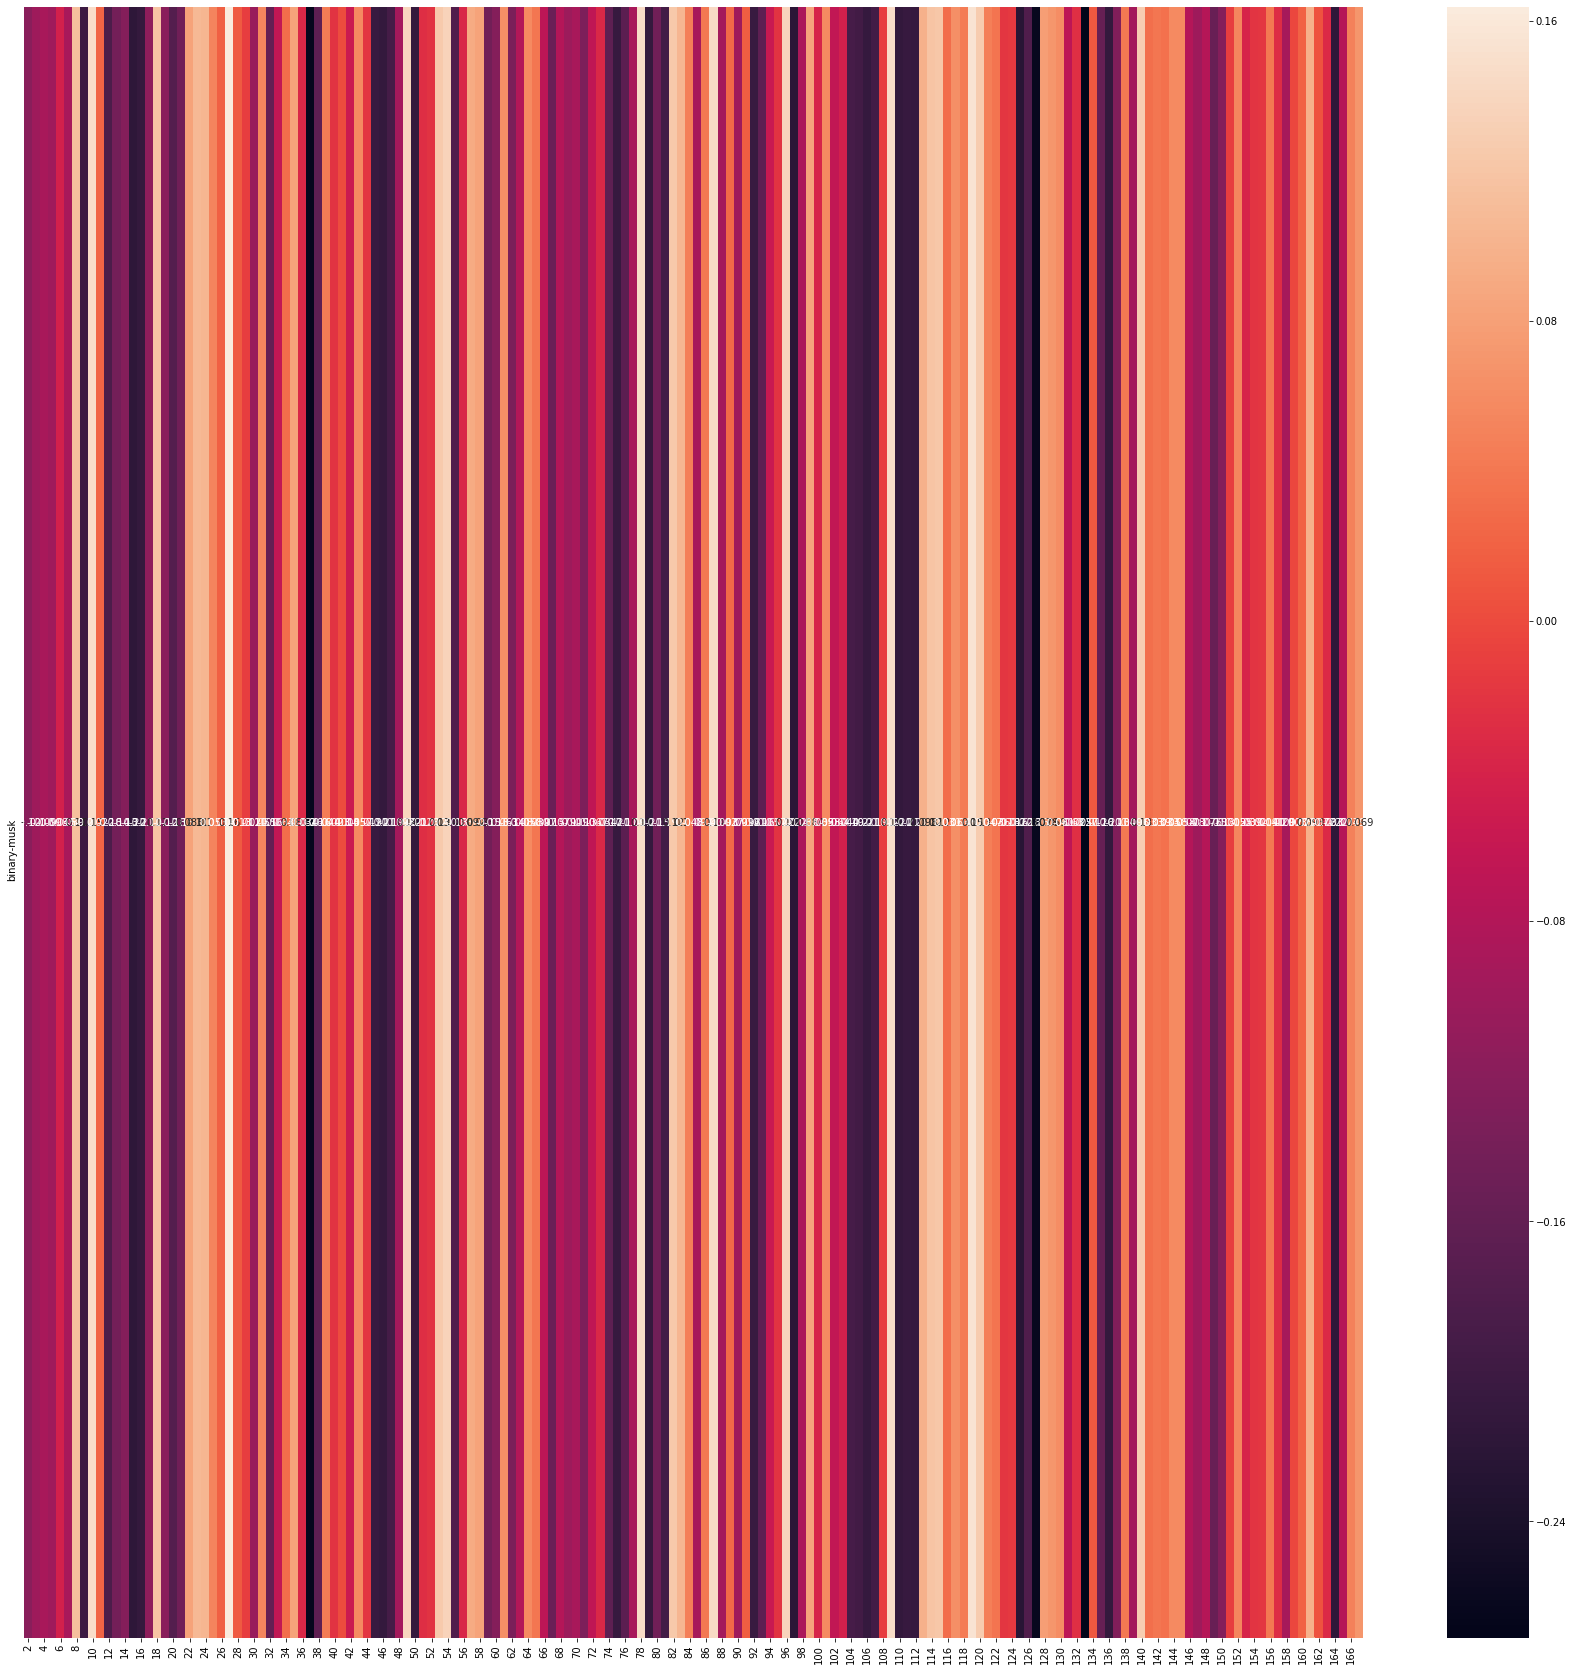

In [63]:
plt.figure(figsize=(30,30))
sns.heatmap(corrtable.loc[['binary-musk'],'2':'167'],annot=True)
plt.show()


 ## "8","10","18","27","49","53","78","87","96","109","114","115","119","120","140","161" are good corr features

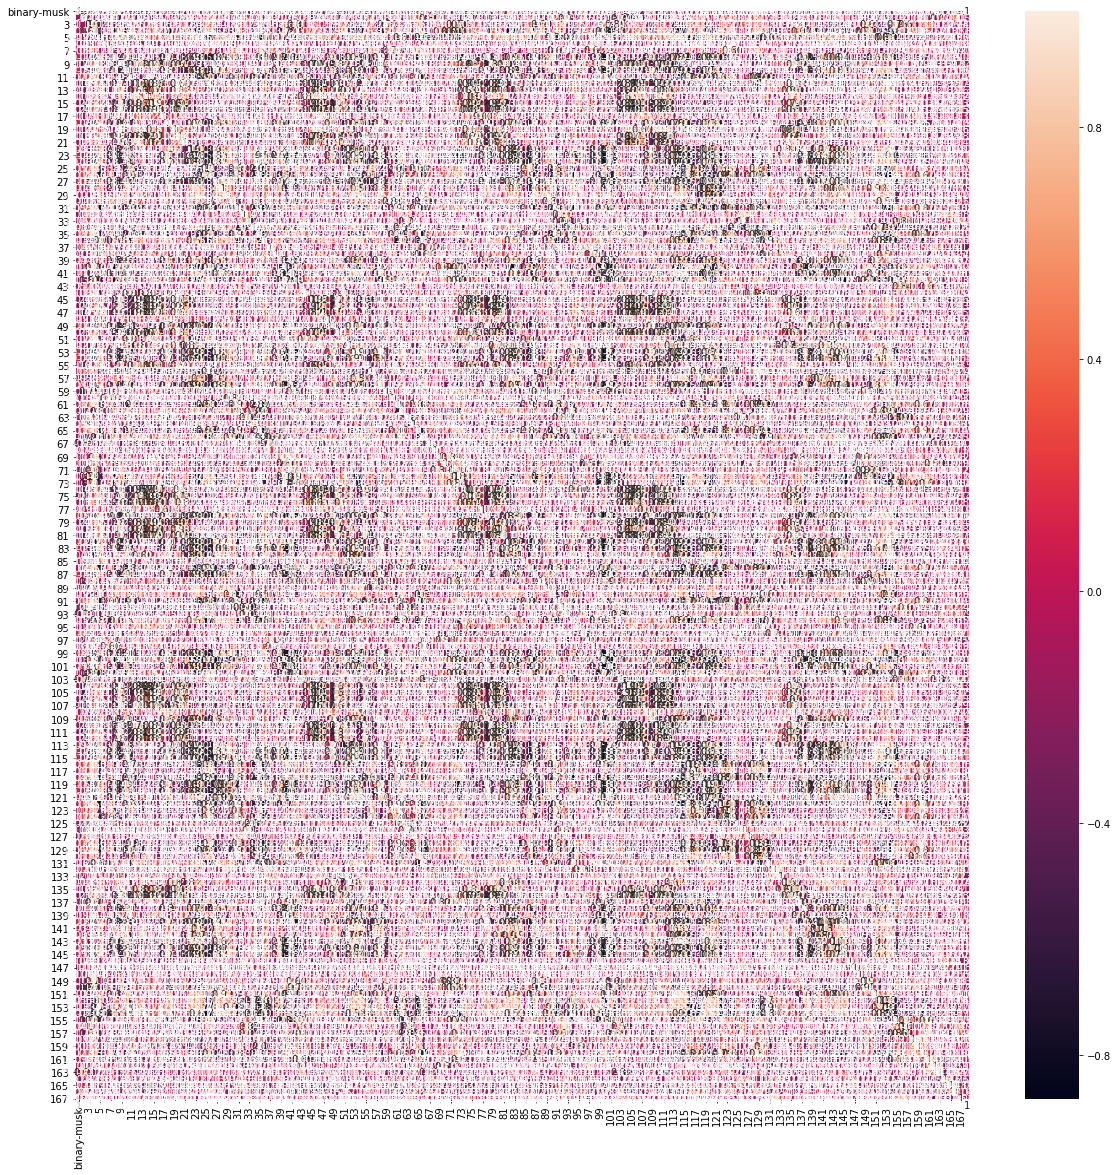

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(database.corr(),annot=True)
plt.show()

## Corr tables every features